# Apple Stock Analysis - Celia Guan

The objective of this homework is to practice working with **Pandas Series**. To successfully complete this homework, you may use any resources available to you.

You need to accomplish the following tasks:
1. Download the Apple stock data for the timeframe of 1982 to today.
1. Use the %magic command to activate inline matplotlib graphs
2. Provide an overview of the `Close` series of the Apple stock.
3. Identify three approaches of obtaining the maximum closing price. What is the difference between the approaches?
3. Find the timeframes with the highest stock price surge in five days. Can you explain why these five dates?
4. Resample the `Close` series to represent business quarters with a financial year that ends in September.
3. Identify series of four quarters with the an overall surge in the stock prices that is larger than 100 percent. Can you explain why the larges surge happened? Visualize it.

If you use tutorials/code snippets that you find on the internet to complete this task, make sure that you reference them. Also make sure that the Jupyter notebook is free of mistakes, well-documented, and professionally formatted before you submit it.

This homework is due on **Tuesday, 23 2018**.

*This homework is based on an assignment created by Michele Samorani.*

Lets' make sure that we allow multiple outputs.

In [6]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Install the [pandas-datareader package](https://pandas-datareader.readthedocs.io/en/latest/). This package allows you to obtain stock information.

* Write a function that has the ticker symbol and the start/enddate as input and that returns a dataframe with the stock information.
* Use the function to get the stock information for Apple from 1982 to today.

In [2]:
import pandas
import pandas_datareader.data as web
import datetime

In [3]:
def get_stock(ticker_symbol, start, end):    # a function passes 3 parameters and returns a dataframe
    df = web.DataReader(ticker_symbol, 'yahoo', start, end)
    return df

In [7]:
start = datetime.datetime(1982, 1, 1)   # starting from 1982
end = datetime.date.today()
ap = get_stock('AAPL', start, end)    #get all Apple stock info from 1982 to today
ap.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-01-04,0.395089,0.395089,0.392857,0.392857,0.321458,17813600
1982-01-05,0.377232,0.377232,0.372768,0.372768,0.305020,8960000
1982-01-06,0.370536,0.370536,0.368304,0.368304,0.301367,16520000
1982-01-07,0.343750,0.343750,0.339286,0.339286,0.277623,17511200
1982-01-08,0.354911,0.357143,0.354911,0.354911,0.290408,14151200


Use the %magic command to activate inline matplotlib graphs and plot the `Close` series.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Provide an overview of the Close series of the Apple stock.

In [82]:
closing = ap['Close'].copy()
closing.head(10)

Date
1982-01-04    0.392857
1982-01-05    0.372768
1982-01-06    0.368304
1982-01-07    0.339286
1982-01-08    0.354911
1982-01-11    0.332589
1982-01-12    0.321429
1982-01-13    0.319196
1982-01-14    0.334821
1982-01-15    0.357143
Name: Close, dtype: float64

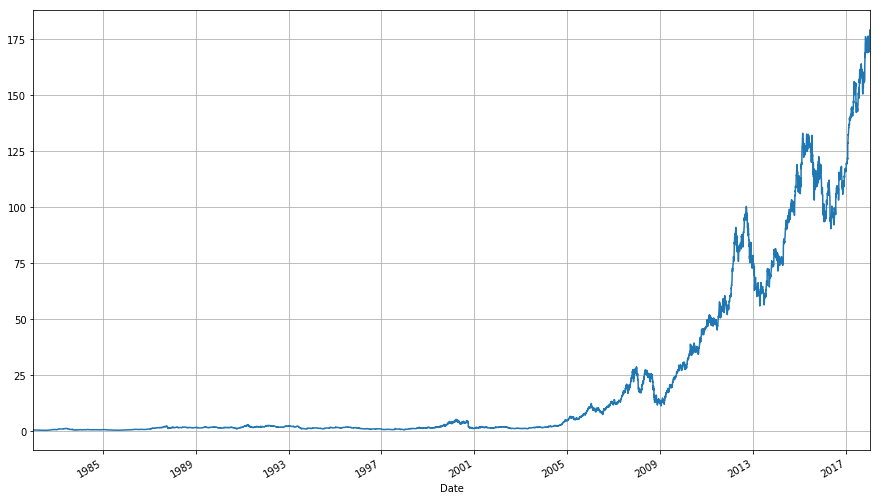

In [10]:
pylab.rcParams['figure.figsize'] = (15, 9)   # resize the plots
closing.plot(grid = True)

Identify three approaches of obtaining the maximum closing price. What is the difference between the approaches?

In [11]:
# First approach 
closing.max()

# This approach only gives single value without index. It's a float number.
# It's the quickest way I can think of to get the value if you don't need index info

179.259995

In [19]:
# Second approach
closing.nlargest(1)

#This approach gives both value and index and some other information. It's a slice of closing series.

Date
2018-01-18    179.259995
Name: Close, dtype: float64

In [18]:
# Third approach 
closing.sort_values(ascending= False)[0]

#This approach is similar to the first approach, but less effective. It gives a float number.

179.259995

Find the five timeframes with the highest stock price surge in five days (in % compared to the closing cost of the previous trading day). Do you notice something? Can you explain what happend during the timeframes?

In [132]:
# find % change of closing price for a period of 5 days
surge = (closing - closing.shift(5))/closing.shift(5)

In [143]:
# list 5 peirods with the highest price surge
percentage = surge.sort_values(ascending = False )
percentage[0:5]

Date
1997-08-07    0.667858
1997-08-06    0.514388
1998-01-06    0.442857
1997-08-08    0.397393
1998-01-08    0.385715
Name: Close, dtype: float64

In [142]:
# Formulate the rusult into %
percentage.apply(lambda x: "{:.2%}".format(x))[0:5]

Date
1997-08-07    66.79%
1997-08-06    51.44%
1998-01-06    44.29%
1997-08-08    39.74%
1998-01-08    38.57%
Name: Close, dtype: object

## Reasons for surging 
* In Augest 1997, Apple announced $150 million investment from Microsoft 

* In 1998, Apple reported earnings of more than $45 million in the first quarter of fiscal 1998, becuase of it's successful G3 product  

Resample the Close series to represent business quarters with a financial year that ends in September.

In [144]:
# resample closing series into quarters and get the mean for each quarter 
closing_q = closing.resample("Q").mean()
closing_q.head()

Date
1982-03-31    0.327765
1982-06-30    0.263747
1982-09-30    0.270752
1982-12-31    0.503418
1983-03-31    0.724383
Freq: Q-DEC, Name: Close, dtype: float64

Identify series of four quarters with the an overall surge in the stock prices that is larger than 100 percent. 
Can you explain why the largest surge happened?.

In [ ]:
# find % change of closing price for a period of 4 quarters 
q_surge = (closing_q - closing_q.shift(4))/closing_q.shift(4)

In [137]:
# list those quarters with the changes that are over 100%
result = q_surge[q_surge>1]
result

Date
1983-03-31    1.210070
1983-06-30    2.535599
1983-09-30    1.342265
1986-09-30    1.145433
1987-03-31    1.380916
1987-06-30    1.310072
1987-09-30    1.777266
1987-12-31    1.151228
1998-12-31    1.032061
1999-12-31    1.474256
2000-03-31    2.051193
2000-06-30    1.480830
2004-12-31    1.551070
2005-03-31    2.286090
2005-06-30    1.642195
2005-09-30    1.752693
2005-12-31    1.284838
2007-09-30    1.048307
2007-12-31    1.156003
2009-12-31    1.077988
2010-03-31    1.253349
Name: Close, dtype: float64

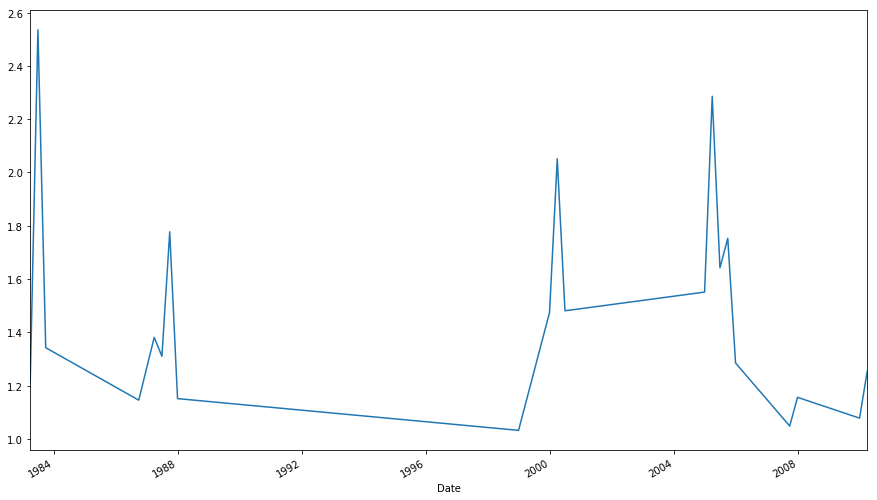

In [125]:
# Visualize series of four quarters that closing price surge are over 100%
result.plot()

In [92]:
# find the quater with the highest % change
q_surge[q_surge>1].nlargest(1)

Date
1983-06-30    2.535599
Name: Close, dtype: float64

## Reseason
Apple introduced the Lisa personal computer. 

Visualize the stock price for the quarters with the highest price surge.

In [139]:
# Get the daily prices for four qaurters with the highest surge 
high_res = closing["1982-07-01" : "1983-06-30"] 

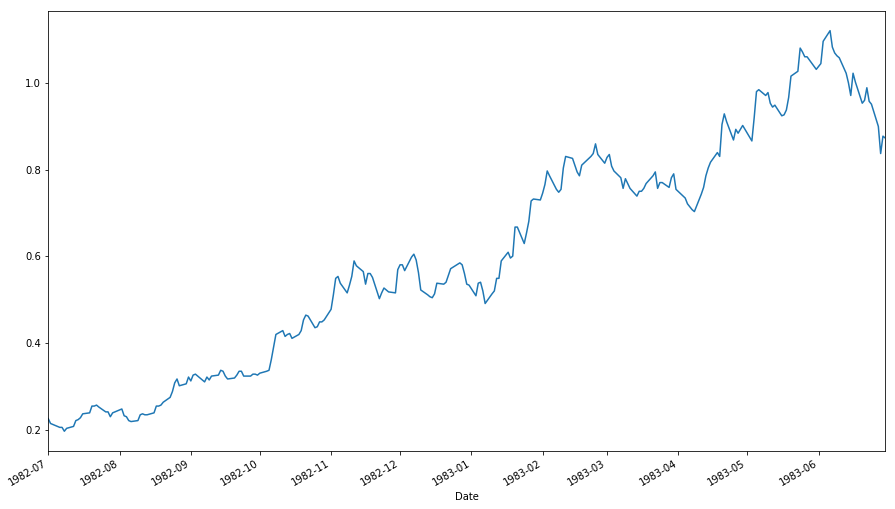

In [138]:
# Visualize these four quarters with the highest price surge
high_res.plot()

# Reference:
https://ntguardian.wordpress.com/2016/09/19/introduction-stock-market-data-python-1/

http://pandas-datareader.readthedocs.io/en/latest/remote_data.html

https://stackoverflow.com/questions/22991567/pandas-yahoo-finance-datareader

http://www.nytimes.com/1997/08/07/business/microsoft-comes-to-the-aid-of-a-struggling-apple.html

http://money.cnn.com/1998/01/06/technology/apple_chrono/

http://oldcomputers.net/lisa.html

http://www.secnetix.de/olli/Python/lambda_functions.hawk